# Atticus Soane
# Final Project
# Problem 3 - Acoustic Waves

The air pressure $p(x,t)$ in an organ pipe is governed by the wave equation: $$\frac{\partial^{2}p}{\partial t^{2}} = c^{2}\frac{\partial^{2}p}{\partial x^{2}},\:\:0 \lt x \lt l,\:\: t \geq 0$$ where $l$ is the length of the pipe and $c$ is a constant greater than zero. There are two sets of boundary conditions. If the pipe is open at both ends: $$p(0, t) = p_{0},\:\: p(l, t) = p_{0}$$ If the pipe is closed at $x = l$: $$p(0, t) = p_{0},\:\:\frac{\partial p}{\partial x}(l, t) = 0$$ Assume that $c=l=1$, and the initial conditions are given by: $$p(x,0) = p_{0}\text{cos}(2\pi x),\:\:\frac{\partial p}{\partial t}(x,0) = 0,\:\:0 \leq x \leq 1$$

# Part a)
Write down an explicit finite difference method and give stability conditions as well as the order of the method. 

Using second order finite differences to rewrite the wave equation yields the following method: $$\frac{P_{j}^{n+1} - 2P_{j}^{n} + P_{j}^{n-1}}{k^{2}} = c^{2}\frac{P_{j+1}^{n} - 2P_{j}^{n} + P_{j-1}^{n}}{h^{2}}$$ Rearranging yields the final form of the explicit method: $$P_{j}^{n+1} = 2P_{j}^{n} - P_{j}^{n-1} + \frac{c^{2}k^{2}}{h^{2}}\bigg(P_{j+1}^{n} - 2P_{j}^{n} + P_{j-1}^{n}\bigg)$$

To prove the order of the method, I will use Taylor expansions around time and space, beginning with time. The left side of the equation can be written as a Taylor expansion around $P_{j}^{n}$: $$P_{j}^{n+1} = P_{j}^{n} + \bigg(k\bigg)P_{t} + \bigg(\frac{k^{2}}{2}\bigg)P_{tt} + \bigg(\frac{k^{3}}{3!}\bigg)P_{ttt} + \bigg(\frac{k^{4}}{24}\bigg)P_{tttt} + O\bigg(k^{5}\bigg) + ...$$ $$P_{j}^{n-1} = P_{j}^{n} - \bigg(k\bigg)P_{t} + \bigg(\frac{k^{2}}{2}\bigg)P_{tt} - \bigg(\frac{k^{3}}{3!}\bigg)P_{ttt} + \bigg(\frac{k^{4}}{24}\bigg)P_{tttt} - O\bigg(k^{5}\bigg) + ...$$ Thus the second order difference approximation becomes: $$D_{k}^{2} = \frac{\bigg[P_{j}^{n} + P_{j}^{n} - 2P_{j}^{n}\bigg] + \bigg[\bigg(k\bigg)P_{t} - \bigg(k\bigg)P_{t}\bigg] + \bigg[\bigg(\frac{k^{2}}{2}\bigg)P_{tt} +\bigg( \frac{k^{2}}{2}\bigg)P_{tt}\bigg] + \bigg[\bigg(\frac{k^{3}}{3!}\bigg)P_{ttt} -\bigg(\frac{k^{3}}{3!}\bigg)P_{ttt}\bigg] + \bigg[\bigg(\frac{k^{4}}{4!}\bigg)P_{tttt}+\bigg(\frac{k^{4}}{4!}\bigg)P_{tttt}\bigg] + O\bigg(k^{5}\bigg)}{k^{2}}$$ After cancellation: $$D_{k}^{2} = P_{tt} + \bigg(\frac{2k^{2}}{4!}\bigg)P_{tttt} + O\bigg(k^{4}\bigg)$$ Thus, we have proved that the method is second order in time $O\bigg(k^{2}\bigg)$. We can perform the same proof to demonstrate that the method is also second order in space, $O\bigg(h^{2}\bigg)$. The proof below is the same, just expanded with respect to $h$ instead of $k$, and as $c^{2} = 1$ in our case, it has been disregarded: $$P_{j+1}^{n} = P_{j}^{n} + \bigg(h\bigg)P_{x} + \bigg(\frac{h^{2}}{2}\bigg)P_{xx} + \bigg(\frac{h^{3}}{3!}\bigg)P_{xxx} + \bigg(\frac{h^{4}}{24}\bigg)P_{xxxx} + O\bigg(h^{5}\bigg) + ...$$ $$P_{j-1}^{n} = P_{j}^{n} - \bigg(h\bigg)P_{x} + \bigg(\frac{h^{2}}{2}\bigg)P_{xx} - \bigg(\frac{h^{3}}{3!}\bigg)P_{xxx} + \bigg(\frac{h^{4}}{24}\bigg)P_{xxxx} - O\bigg(h^{5}\bigg) + ...$$ Thus the second order difference approximation becomes: $$D_{h}^{2} = \frac{\bigg[P_{j}^{n} + P_{j}^{n} - 2P_{j}^{n}\bigg] + \bigg[\bigg(h\bigg)P_{x} - \bigg(h\bigg)P_{x}\bigg] + \bigg[\bigg(\frac{h^{2}}{2}\bigg)P_{xx} +\bigg( \frac{h^{2}}{2}\bigg)P_{xx}\bigg] + \bigg[\bigg(\frac{h^{3}}{3!}\bigg)P_{xxx} -\bigg(\frac{h^{3}}{3!}\bigg)P_{xxx}\bigg] + \bigg[\bigg(\frac{h^{4}}{4!}\bigg)P_{xxxx}+\bigg(\frac{h^{4}}{4!}\bigg)P_{xxxx}\bigg] + O\bigg(h^{5}\bigg)}{h^{2}}$$ After cancellation: $$D_{h}^{2} = P_{tt} + \bigg(\frac{2h^{2}}{4!}\bigg)P_{xxxx} + O\bigg(h^{4}\bigg)$$ Thus, we have proved the method is second order in space $O\bigg(h^{2}\bigg)$, and we have proved that the method is second order: $$O\bigg(k^{2} + h^{2}\bigg)$$

To determine the stability conditions, I will perform von Neumann analysing, substituting: $$P_{j}^{n} = g^{n}e^{imjh}$$ into the finite difference scheme, which yields (with $\lambda = \frac{c^{2}k^{2}}{h^{2}}$): $$g^{n+1}e^{imjh} -2g^{n}e^{imjh} + g^{n-1}e^{imjh} = \lambda^{2}\bigg(g^{n}e^{im(j+1)h} - 2g^{n}e^{imjh} + g^{n}e^{im(j-1)h}\bigg)$$ Factoring out $g^{n}e^{imjh}$ and dividing out yields and applying trigonometric identities to $\bigg(e^{imh} + e^{-imh}$\bigg): $$g - 2 +\frac{1}{g} = -4\lambda^{2}sin^{2}(\frac{mh}{2})$$ The left side can be rewritten as a difference of squares, and the right side can be rewritten as a term squared: $$\bigg(\sqrt{g} - \frac{1}{\sqrt{g}}\bigg)^{2} = \bigg(\pm 2i\lambda sin(\frac{mh}{2})\bigg)^{2}$$ Taking the square root of both sides and multiplying through by $\sqrt{g}$ yields an expression that is quadratic in $\sqrt{g}$: $$g \pm 2i\lambda sin(\frac{mh}{2})\sqrt{g} - 1 = 0$$ Solving via the quadratic expression and squaring both sides yields the following roots: $$g_{\pm} =  \bigg(\sqrt{1 - \lambda^{2}sin^{2}(\frac{mh}{2})} \pm i\lambda sin(\frac{mh}{2})\bigg)^{2}$$ As $|sin^{2}(\frac{mh}{2})| \leq 1$, $|g_{\pm}| \leq 1$ iff $|\lambda| \leq 1$. We know that $g_{+} = g_{-}$ when $mh = 0$ or when $|\lambda| = 1$ and $mh = \pi$. If $g_{+} \neq g_{-}$, then the following expression can be written for $g^{n}$: $$g^{n} = A_{+}g_{+}^{n} + A_{-}g_{-}^{n}$$ If $g_{+} = g_{-} = g$, the expression for $g^{n}$ becomes: $$g^{n} = Ag^{n} + Bng^{n-1}$$ This growth is linear, and as the $P$ is second order in $t$, this is acceptable as $P_{tt} = 0$ Thus, we have demonstrated that: $$|\lambda| \leq 1$$ is a sufficient stability condition for this scheme. 

# Part b)
Implement the method given in part a) for the open pipe with $p_{0} = 0.9$ and step sizes with $k=h=0.05$. Plot the numerical solution at $t =0.5, 1.0$

Below is a straightforward implementation of the explicit divided difference method that is written above. As the method is explicit, the implementation is simple, except at the point $P_{j}^{1}$. As this is a multi-step method, to approximate $P_{j}^{1}$ we need the points $P_{j}^{-1}$ and $P_{j}^{0}$. $P_{j}^{0}$ is provided in the initial condition, but to account for $P_{j}^{-1}$, we will use the second part of the initial condition: $$\frac{\partial p}{\partial t}(x,0) = 0$$ Thus, we can construct a divided difference approximation to the derivative at $t = 0$ yielding: $$\frac{P_{j}^{1} - P_{j}^{-1}}{2k} = 0 \implies P_{j}^{1} = P_{j}^{-1}$$ Plugging this into the divided difference method yields an expression to approximate $P_{j}^{1}$: $$P_{j}^{1} = P_{j}^{0} + \frac{\lambda^{2}}{2}\bigg(P_{j+1}^{0} - 2P_{j}^{0} + P_{j-1}^{0}\bigg)$$ for $\lambda = \frac{ck}{h}$. 

(In my code below, I refer to lambda as alpha because lambda appears to be a command in python So I just switched it to alpha)

In [82]:
import numpy as np
import matplotlib.pyplot as plt
#this function is designed to set the value for the inital conditions. As inputs, it takes the value of x and the 
#value given for p0 in the problem. As an output, it returns the value of the function at that point. 
def I(x, p0):
    val =  p0 * np.cos(2 * np.pi * x)
    return(val)
#this function is designed to determine the approximation to the function p(x, t) at a given time step T. as inputs,
#it takes I- the function to set the initial condition, p0- a value given in the problem, lower- the lower range 
#of the x-values, l- the upper limit of the x-values, h- the step value in the x direction, T- the time at which
#the approximation is for, k- the length of the time step, and c- a constant given in the problem. The output is 
#x-, the range of x-values used, and p_next-the approximation of p(x, T)
def wave_open(I, p0, lower, l, h, T, k, c):
    x_len = l - lower #length of x-range
    M = int(x_len/h) #determines number of nodes to be used in x-range
    x = np.linspace(lower, l, M+1) #creates equispaced nodes
    N = int(T/k) #determines number of time steps to use
    p_past = np.zeros(M+1) #N x 1 zero vector to store p^n-1
    p_current = np.zeros(M+1) #Nx 1 zero vector to store p^n
    p_next = np.zeros(M+1) #N x 1 zero vector to store p^n+1
    alpha = ((c**2)*(k**2)) / (h**2) #this value is lambda, used alpha instead because lambda is a command in python
    for i in range(M+1): #sets the initial condition
        p_current[i] = I(x[i], p0) 
    for i in range(1, M): #uses second part of the initial condition for special case of p^1
        p_next[i] = p_current[i] + (alpha/2) * (p_current[i+1] - 2*p_current[i] + p_current[i-1])
    p_next[0] = p0 #set the boundary condition for p^1 case
    p_next[M] = p0
    p_past[:] = p_current #sets p^n to p^n-1 for the next step
    p_current[:] = p_next #sets p^n+1 to p^n for the next step
    for k in range(N-1): #performs finite difference method above for all other time steps for interior points
        for i in range(1, M):
            p_next[i] = 2*p_current[i] - p_past[i] + alpha*(p_current[i+1] - 2*p_current[i] + p_current[i-1])
        p_next[0] = p0 #sets boundary condition
        p_next[M] = p0
        p_past[:] = p_current #sets p^n-1 and p^n for the next step
        p_current[:] = p_next
    return(x, p_next)
    

As is stated in the problem, I have plotted below the approximations generated by this divided difference method for the open pipe problem at $T= 0.5, 1.0$. I have also plotted the approximations at each time step to demonstrate the wave motion occuring before that point (because I thought it was interesting to see, and the approximations at the individual time points struck me as uninteresting). 

Text(0, 0.5, 'Pressure in pipe')

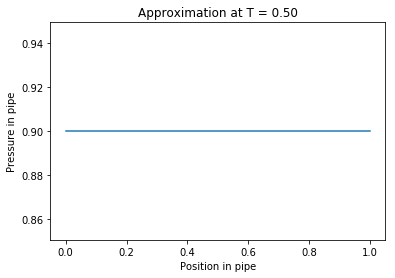

In [83]:
x1, p1 = wave_open(I, 0.9, 0, 1.0, 0.05, 0.50, 0.05, 1)
plt.plot(x1, p1)
plt.title("Approximation at T = 0.50")
plt.xlabel("Position in pipe")
plt.ylabel("Pressure in pipe")

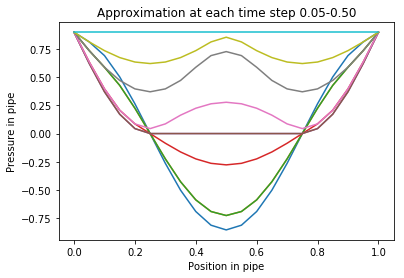

In [84]:
t_list1 = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
for i in t_list1:
    x, p = wave_open(I, 0.90, 0, 1.0, 0.05, i, 0.05, 1)
    plt.plot(x, p)
    plt.title("Approximation at each time step 0.05-0.50")
    plt.xlabel("Position in pipe")
    plt.ylabel("Pressure in pipe")

Text(0, 0.5, 'Pressure in pipe')

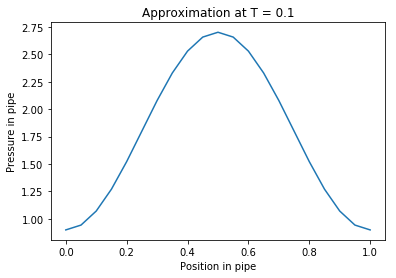

In [85]:
x2, p2 = wave_open(I, 0.9, 0, 1.0, 0.05, 1.0, 0.05, 1)
plt.plot(x2, p2)
plt.title("Approximation at T = 0.1")
plt.xlabel("Position in pipe")
plt.ylabel("Pressure in pipe")

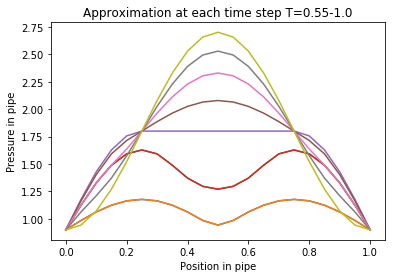

In [86]:
t_list2 = [0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 1.0]
for j in t_list2:
    x, p = wave_open(I, 0.90, 0, 1.0, 0.05, j, 0.05, 1)
    plt.plot(x, p)
    plt.title("Approximation at each time step T=0.55-1.0")
    plt.xlabel("Position in pipe")
    plt.ylabel("Pressure in pipe")

# Below, I have included a plot of each time step $T= 0$ to $T=1.0$ at $k=0.05$ to show the full time evolution over 1 second 

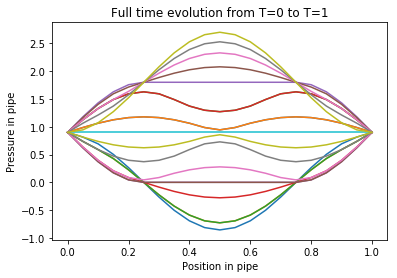

In [87]:
final_t_list = t_list1 + t_list2
for j in final_t_list:
    x, p = wave_open(I, 0.90, 0, 1.0, 0.05, j, 0.05, 1)
    plt.plot(x, p)
    plt.xlabel("Position in pipe")
    plt.ylabel("Pressure in pipe")
    plt.title("Full time evolution from T=0 to T=1")

# Part c)

Implement the method for the closed pipe, holding all other conditions the same. 

In order to implement this methdo for the closed pipe case, I will use the exact same code as above but with one key difference: Instead of setting the boundary condition to a known constant value, I will use a Neumann boundary condition. This is because the second divided difference method used for the second derivative with respect to $x$ encounters a problem at $P_{M}^{n+1}$ as the point $P_{M+1}^{n}$ would be needed to approximate this point. To account for this, we will use that in the problem it is given that $$\frac{\partial p}{\partial x}(l, t) = 0$$ Thus, by way of the same process as used for the initial condition, by constructing an approximation of the derivative with respect to $x$ using the first divided difference: $$\frac{P_{M+1} - P_{M-1}}{2h} = 0 \implies P_{M+1} = P_{M-1}$$ This will be plugged into the original divided difference to yield the boundary condition: $$P_{M}^{N+1} = 2P_{M}^{N} - P_{M}^{N-1} + 2\lambda \bigg(P_{M-1}^{N} - P_{M}^{N}\bigg)$$ This will be slightly altered for the special case of $P_{M}^{1}$, in which case the expression will be: $$P_{M}^{1} = P_{M}^{0} + \lambda \bigg(P_{M-1}^{0} - P_{M}^{0}\bigg)$$

# As this is the same function as above, which I already annotated, just with a change for the boundary condition, I will only be annotating where the code has been altered to reflect the new boundary condition. 

In [88]:
def wave_closed(I, p0, lower, l, h, T, k, c):
    x_len = l - lower
    M = int(x_len/h)
    x = np.linspace(lower, l, M+1)
    N = int(T/k)
    p_past = np.zeros(M+1)
    p_current = np.zeros(M+1)
    p_next = np.zeros(M+1)
    alpha = ((c**2)*(k**2)) / (h**2) #once again alpha is being used to represent lambda because lambda is a command
    for i in range(M+1):
        p_current[i] = I(x[i], p0)
    for i in range(1, M):
        p_next[i] = p_current[i] + (alpha/2) * (p_current[i+1] - 2*p_current[i] + p_current[i-1])
    p_next[0] = p0
    #line below is the new boundary condition when applied to the special case p^1
    p_next[M] = p_current[M] + alpha*(p_current[M-1] - p_current[M]) 
    p_past[:] = p_current
    p_current[:] = p_next
    for k in range(N-1):
        for i in range(1, M):
            p_next[i] = 2*p_current[i] - p_past[i] + alpha*(p_current[i+1] - 2*p_current[i] + p_current[i-1])
        p_next[0] = p0
        #line below is the new boundary condition applied at every other time step p^n+1
        p_next[M] = 2 * p_current[M] - p_past[M] + (2*alpha)*(p_current[M-1] - p_current[M])
        p_past[:] = p_current
        p_current[:] = p_next
    return(x, p_next)

Text(0, 0.5, 'Pressure in pipe')

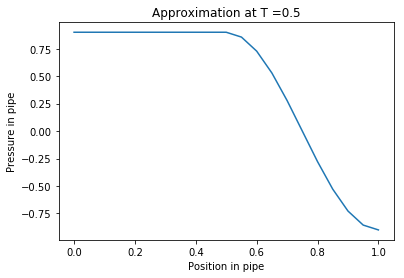

In [89]:
x1_close, p1_close = wave_closed(I, 0.9, 0, 1.0, 0.05, 0.50, 0.05, 1)
plt.plot(x1_close, p1_close)
plt.title("Approximation at T =0.5")
plt.xlabel("Position in pipe")
plt.ylabel("Pressure in pipe")

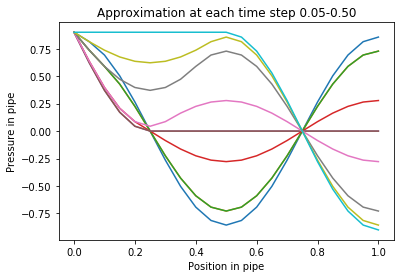

In [90]:
t_list1 = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50]
for i in t_list1:
    x, p = wave_closed(I, 0.90, 0, 1.0, 0.05, i, 0.05, 1)
    plt.plot(x, p)
    plt.title("Approximation at each time step 0.05-0.50")
    plt.xlabel("Position in pipe")
    plt.ylabel("Pressure in pipe")

Text(0.5, 1.0, 'Approximation at T = 1.0')

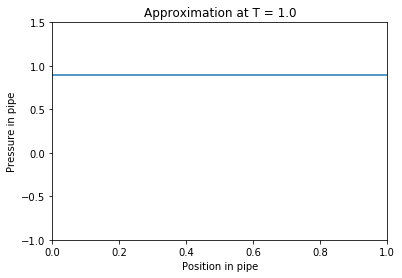

In [91]:
x2_close, p2_close = wave_closed(I, 0.9, 0, 1.0, 0.05, 1.0, 0.05, 1)
plt.plot(x2_close, p2_close)
axes = plt.gca()
axes.set_xlim([0.0,1.0])
axes.set_ylim([-1.0,1.500])
plt.xlabel("Position in pipe")
plt.ylabel("Pressure in pipe")
plt.title("Approximation at T = 1.0")

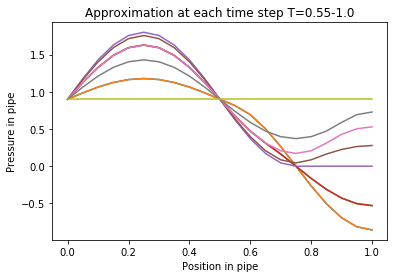

In [92]:
t_list2 = [0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 1.0]
for j in t_list2:
    x, p = wave_closed(I, 0.90, 0, 1.0, 0.05, j, 0.05, 1)
    plt.plot(x, p)
    plt.title("Approximation at each time step T=0.55-1.0")
    plt.xlabel("Position in pipe")
    plt.ylabel("Pressure in pipe")

# Below, I have included a plot of each time step $T= 0$ to $T=1.0$ at $k=0.05$ to show the full time evolution over 1 second 

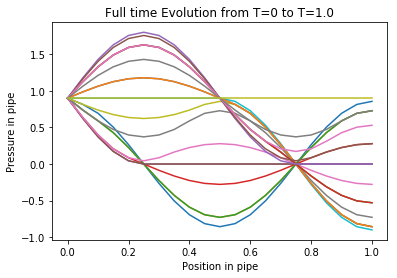

In [93]:
final_t_list = t_list1 + t_list2
for j in final_t_list:
    x, p = wave_closed(I, 0.90, 0, 1.0, 0.05, j, 0.05, 1)
    plt.plot(x, p)
    plt.title("Full time Evolution from T=0 to T=1.0")
    plt.xlabel("Position in pipe")
    plt.ylabel("Pressure in pipe")

# Part d)
Repeat part b) except with $k = h= 0.025$. Construct a higher order approximation by extrapolating this numerical solution with the numerical solution from part b) and state the order of the new approximation. 

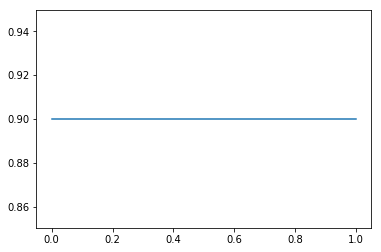

In [94]:
y1, p_1 = wave_open(I, 0.9,0, 1, 0.025, 0.5, 0.025, 1)
plt.plot(y1, p_1)

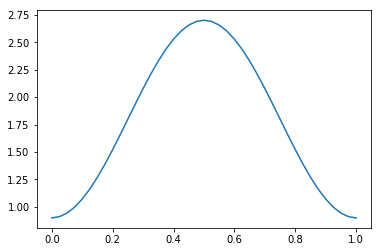

In [95]:
y2, p_2 = wave_open(I, 0.9,0, 1, 0.025, 1.0, 0.025, 1)
plt.plot(y2, p_2)

To use these two approximations to extrapolate to a higher order approximation, I will use Richardson extrapolation. $$S_{k}[p] = T_{k}[p] + \frac{4}{3}\bigg(T_{\frac{k}{2}}[p] - T_{k}[p]\bigg)$$ It is simple to demonstrate that this approximation is 4th order in time (and space, but for the interest of this project I will only demonstrate time). As I proved algebraically in part a) via Taylor expansion, the divided difference is second order in time: $$P_{tt} + \bigg(\frac{2k^{2}}{4!}\bigg) + O\bigg(k^{4}\bigg)$$ Now, if we consider the term: $$\frac{4}{3}\bigg(T_{\frac{k}{2}}[p] - T_{k}[p]\bigg)$$, plugging in the Taylor expansions for $k$ and $\frac{k}{2}$ yields: $$\frac{4}{3}\bigg[\bigg(P_{tt} + \frac{2}{4!}\bigg(\frac{k}{2}\bigg)^{2} + O\bigg(k^{4}\bigg)\bigg) - \bigg(P_{tt} + \frac{2}{4!}k^{2} + O\bigg(k^{4}\bigg)\bigg]$$ After cancellation, this yields $$\frac{4}{3}\bigg[\bigg(\frac{k^{2}}{48} + O\bigg(k^{4}\bigg)\bigg) - \bigg(\frac{k^{2}}{12} + O\bigg(k^{4}\bigg)\bigg)\bigg]$$ Multiplying through by $\frac{4}{3}$ and subtracting, this leaves us with simply: $$\frac{-k^{2}}{12} + O\bigg(k^{4}\bigg)$$ When adding this to the first term of the extrapolation, $T_{k}[p]$, this cancels with the second order term, leaving an approximation that is $$P_{tt} + O\bigg(k^{4}\bigg)$$ and thus we have demonstrated that the approximation is indeed fourth order in time. The same steps could be followed to demonstrate that the approximation is fourth order in space. 

In [96]:
#the code below performs the Richardson extrapolation to produce a fourth order approximation. As an input, it takes
#two lists obtained at different values of k, and the output returns the fourth order approximation
def richardson(l1, l2):
    extrap = []
    n = len(l1)
    initial = l1[0] + (4/3)*(l2[0] - l1[0])
    extrap.append(initial)
    for j in range(1, n):
        val = l1[j] + (4/3)*(l2[2*j] - l1[j])
        extrap.append(val)
    return(extrap)

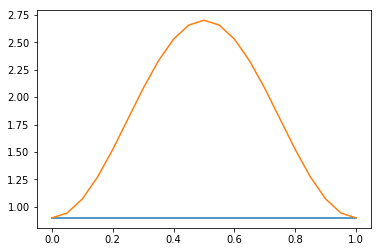

In [97]:
approx1 = richardson(p1, p_1)
approx2 = richardson(p2, p_2)
plt.plot(x1, approx1)
plt.plot(x2, approx2)